# Bank Customer Churn Model

## Learning Objective
- Data Encoding
- Feature Scaling
- Handling Imbalance Data
-       a.Random Under Sampling
-       b.Random Over Sampling
- Support Vector Machine Classifier
- Grid Search for Hyperparameter Tunning 

## Import Library

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [4]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv") 

## Analyse Data

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.duplicated("CustomerId").sum()

0

In [8]:
df = df.set_index("CustomerId")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


## Data Preprocessing

In [10]:
# Encoding
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df.replace({'Geography':{'France':2,"Germany":1,'Spain':0}},inplace = True )

In [12]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df.replace({"Gender":{"Male":0,"Female":1}},inplace = True)

In [14]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [15]:
df.replace({"Num Of Products":{1:0,2:1,3:1,4:1}},inplace = True)

In [16]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [17]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [18]:
df['Balance'].value_counts()

Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [19]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [20]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

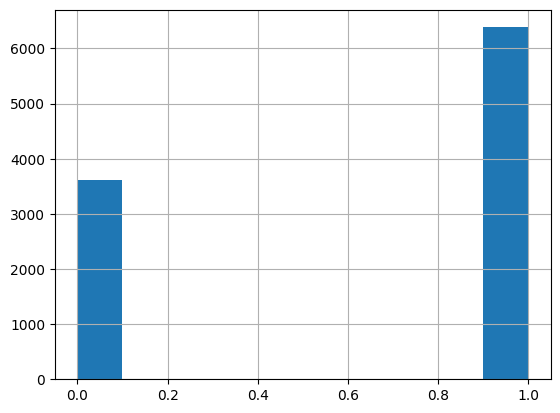

In [21]:
df["Zero Balance"].hist()    

In [22]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

## Define Target Variable (y) and Feature Variables (X)

In [23]:
# Define Label and Features
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [24]:
y = df['Churn']
X = df.drop(['Surname','Churn'],axis = 1)

In [25]:
X.shape,y.shape

((10000, 11), (10000,))

# Handling Imbalance Data
- Class Imbalance is a common problem in machine learning, especially in classification problems as machine learning algorithms are designed to maximize accuracy and reduce errors. if the data set is imabalance then in such cases, just by predicting the majority class we get a pretty high accuracy,but fails to capture the minority class, which is most often the point of creating the model in the first place. Like in
-        1.Fraud detection
-        2.Spam filtering
-        3.Disease screening
-        4.Online sales churn
-        5.Advertising click-throughs

-    Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.
-    undersampling can be a good choice when you have a ton of data-think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.
-    In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
-    A drawback to consider when undersampling is that it can cause overfitting and poor generalization to your test set.
-    Oversampling can be defined as adding more copies to the minority class, Oversampling can be a good choice when you don't have a ton of data to work with.
-    The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfiting. 

In [26]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Churn', ylabel='count'>

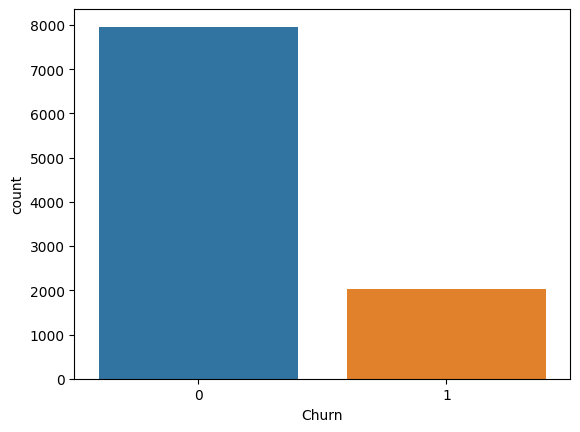

In [27]:
sns.countplot(x='Churn',data = df)

In [28]:
# Random Under Sampling 
from imblearn.under_sampling import RandomUnderSampler

In [29]:
rus = RandomUnderSampler(random_state= 2529)

In [30]:
X_rus, y_rus = rus.fit_resample(X,y)

In [31]:
X_rus.shape,y_rus.shape,X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [32]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [33]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

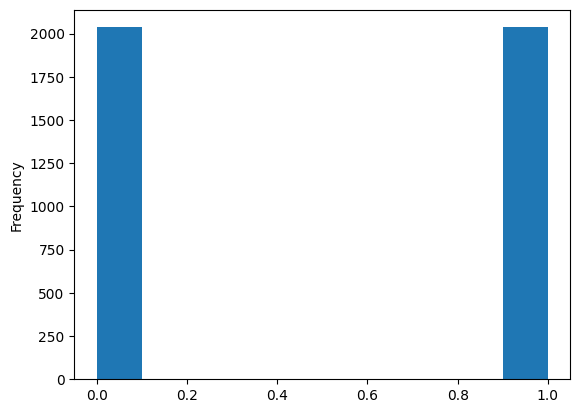

In [34]:
y_rus.plot(kind = 'hist')

In [35]:
# Random Over Sampling 
from imblearn.over_sampling import RandomOverSampler

In [36]:
ros = RandomOverSampler(random_state = 2529)

In [37]:
X_ros ,y_ros = ros.fit_resample(X,y)





In [38]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [39]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

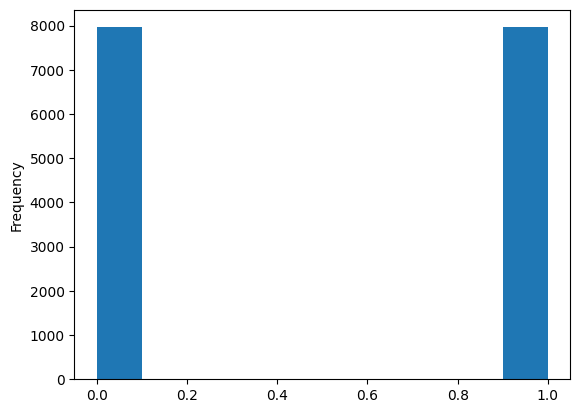

In [40]:
y_ros.plot(kind = 'hist')

## Train Test Split

In [41]:
# Train Test Split 
from sklearn.model_selection import train_test_split

In [42]:
# Split Original Data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 2529)

In [43]:
# Split Random Under Sample Data
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_rus,y_rus,test_size = 0.3,random_state= 2529)

In [44]:
# Split Random Over Sample Data
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X_ros,y_ros,test_size = 0.3,random_state= 2529)

In [45]:
# Standardize Features 
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()

In [47]:
# Standardize Original Data 

In [48]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [49]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [50]:
# Sandardize Random Under Sample Data 
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [51]:
# Sandardize Random Over Sample Data 
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

## Modeling

In [52]:
# Support Vector Machine Classifier
from sklearn.svm import SVC

In [53]:
svc = SVC()

In [54]:
svc.fit(X_train,y_train)

SVC()

In [55]:
y_pred = svc.predict(X_test)

In [56]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Evaluation

In [57]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

In [58]:
accuracy_score(y_test,y_pred)

0.8436666666666667

In [59]:
confusion_matrix(y_test,y_pred)

array([[2381,   33],
       [ 436,  150]], dtype=int64)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



In [61]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {'C': [0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [63]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)

In [64]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [65]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [66]:
grid_predictions = grid.predict(X_test)

In [67]:
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]], dtype=int64)

In [68]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



In [69]:
# Model with Random Under Sampling

In [70]:
svc_rus = SVC()

In [71]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [72]:
y_pred_rus = svc_rus.predict(X_test_rus)

In [73]:
# Model Accuracy

In [74]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[470, 157],
       [174, 422]], dtype=int64)

In [75]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



In [76]:
# Hyperparameter Tuning

In [77]:
param_grid = {'C':[0.1,1,  10],'gamma': [1,0.1,0.01],'kernel':['rbf'],'class_weight': ['balanced']}

In [78]:
 grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)

In [79]:
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.7s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [80]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [81]:
grid_predictions_rus = grid_rus.predict(X_test_rus) 

In [82]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[476, 151],
       [172, 424]], dtype=int64)

In [83]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [84]:
# Model with Random Over Sampling

In [85]:
svc_ros = SVC()

In [86]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [87]:
y_pred_ros = svc_ros.predict(X_test_ros)

In [88]:
# Model Accuracy

In [89]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1823,  556],
       [ 626, 1773]], dtype=int64)

In [90]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [91]:
# Hyperparameter Tuning

In [92]:
param_grid = {'C':[0.1,1,  10],'gamma': [1,0.1,0.01],'kernel':['rbf'],'class_weight': ['balanced']}

In [93]:
 grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)

In [94]:
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  12.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=  11.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   8.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   9.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  10.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   9.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   7.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   8.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [95]:
print(grid_ros.best_estimator_)


SVC(C=10, class_weight='balanced', gamma=1)


In [96]:
grid_predictions_ros = grid_ros.predict(X_test_ros) 

In [97]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]], dtype=int64)

In [98]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



## Predictions

In [99]:
grid_predictions_ros

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

## Explanation
- we have completed this Bank customer Churn Model Project with the help of YBI foundation.
- firstly we imported libraries , imported Dataset from ybifoundation github account
- then we have done data preprocessing, data visualizations
- we built model by training data and testing data
- with the help of hyperparmeter tunning we increased accuracy of the model
- Now, we can predict customer is churning or not